# 1. AI에서 많이 사용되는 메소드


## 1) 데이터 조작

In [3]:
import pandas as pd

data = {
    'A': [1, 2, 3, 4, 5, 6, 7],
    'B': [10, 20, 30, 40, 50, 60, 70],
    'C': [100, 200, 300, 400, 500, 600, 700]
}

df = pd.DataFrame(data)

df



,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500
5,6,60,600
6,7,70,700


In [7]:
print("======apply======")
#각 열의 값에 함수를 적용하고 새로운 열을 생성
df['a_plus'] = df['A'].apply(lambda x : x + 2)

df

print("======map======")
#B열를 딕셔너리를 이용하여 새로운 열 매핑
mapping = {10 : 'Low', 20 : 'Low', 30 : 'Low', 40 : 'Medium', 50 : 'Medium',
           60 : 'High', 70 : 'High'}
print(mapping, type(mapping))
df['b_mapping'] = df['B'].map(mapping)



df

======apply======
======map======
{10: 'Low', 20: 'Low', 30: 'Low', 40: 'Medium', 50: 'Medium', 60: 'High', 70: 'High'} <class 'dict'>


,A,B,C,a_plus,b_mapping
0,1,10,100,3,Low
1,2,20,200,4,Low
2,3,30,300,5,Low
3,4,40,400,6,Medium
4,5,50,500,7,Medium
5,6,60,600,8,High
6,7,70,700,9,High


In [9]:
print("======value_counts()=====")
#열의 고유한 값의 빈도수 계산
print(df['b_mapping'].value_counts())

df

======value_counts()=====
Low       3
Medium    2
High      2
Name: b_mapping, dtype: int64


,A,B,C,a_plus,b_mapping
0,1,10,100,3,Low
1,2,20,200,4,Low
2,3,30,300,5,Low
3,4,40,400,6,Medium
4,5,50,500,7,Medium
5,6,60,600,8,High
6,7,70,700,9,High


In [14]:
print("======cut()=======")

bins = [0,30,200,500,1000] #구간설정
labels = ['낮음','중간','높음','아주높음']#레이블설정
#0 < x <= 30 : "낮음"
#30 < x <= 200 : '중간'
#200 < x <= 500 : '높음'
#500 < x <= 1000 : '아주높음'
df['c_cut'] = pd.cut(df['C'], bins =bins, labels=labels)
df

======cut()=======


,A,B,C,a_plus,b_mapping,c_cut
0,1,10,100,3,Low,중간
1,2,20,200,4,Low,중간
2,3,30,300,5,Low,높음
3,4,40,400,6,Medium,높음
4,5,50,500,7,Medium,높음
5,6,60,600,8,High,아주높음
6,7,70,700,9,High,아주높음


In [25]:
print("=====astype()======")
#열의 데이터 타입을 변경
df.info()

#열 'A'의 데이터 타입을 문자열로 변경
df['A'] = df['A'].astype(str)
df['A'] = df['A'].astype(int)

df.info() #object
df

=====astype()======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          7 non-null      object  
 1   B          7 non-null      int64   
 2   C          7 non-null      int64   
 3   a_plus     7 non-null      int64   
 4   b_mapping  7 non-null      object  
 5   c_cut      7 non-null      category
dtypes: category(1), int64(3), object(2)
memory usage: 619.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          7 non-null      int64   
 1   B          7 non-null      int64   
 2   C          7 non-null      int64   
 3   a_plus     7 non-null      int64   
 4   b_mapping  7 non-null      object  
 5   c_cut      7 non-null      category
dtypes: category(1), int64(4), object(1)
memory usage: 6

,A,B,C,a_plus,b_mapping,c_cut
0,1,10,100,3,Low,중간
1,2,20,200,4,Low,중간
2,3,30,300,5,Low,높음
3,4,40,400,6,Medium,높음
4,5,50,500,7,Medium,높음
5,6,60,600,8,High,아주높음
6,7,70,700,9,High,아주높음


## 2) 그룹화와 집계

In [27]:
print("=====agg()====")
#그룹화된 데이터에 대한 집계함수를 적용함
#b_mapping 열을 기준으로 그룹화하고 각 그룹에서 'A'열의 평균과 'C'열의 합계구하기
grouped = df.groupby('b_mapping')['A'].agg('mean')
print(grouped, type(grouped))
grouped = df.groupby('b_mapping').agg({'A':'mean', 'C':'sum'})
print(grouped, type(grouped))

df

=====agg()====
b_mapping
High      6.5
Low       2.0
Medium    4.5
Name: A, dtype: float64 <class 'pandas.core.series.Series'>
             A     C
b_mapping           
High       6.5  1300
Low        2.0   600
Medium     4.5   900 <class 'pandas.core.frame.DataFrame'>


,A,B,C,a_plus,b_mapping,c_cut
0,1,10,100,3,Low,중간
1,2,20,200,4,Low,중간
2,3,30,300,5,Low,높음
3,4,40,400,6,Medium,높음
4,5,50,500,7,Medium,높음
5,6,60,600,8,High,아주높음
6,7,70,700,9,High,아주높음


In [31]:
# pivot_table()
#b_mapping 열 -> 인덱스, a_plus 열 -> 값으로 하는 피벗테이블 생성
pivot_result = df.pivot_table(index = 'b_mapping', values = 'a_plus', aggfunc = 'mean')
#aggfunc = 'mean' 기본값으로 설정
# sum, min, max 등의 집계함수 사용가능
print(pivot_result, type(pivot_result))
pivot_result

# df

           a_plus
b_mapping        
High          8.5
Low           4.0
Medium        6.5 <class 'pandas.core.frame.DataFrame'>


,a_plus
b_mapping,
High,8.5
Low,4.0
Medium,6.5


In [33]:
print("======groupby()======")

result = df.groupby('c_cut')['B'].agg(['max', 'min', 'mean', 'sum'])
print(result)
# result = df.groupby('c_cut').value_counts()
# result
# df

======groupby()======
        max   min  mean  sum
c_cut                       
낮음      NaN   NaN   NaN    0
중간     20.0  10.0  15.0   30
높음     50.0  30.0  40.0  120
아주높음   70.0  60.0  65.0  130


## +) 데이터 처리

In [38]:
print("=======drop() 열 제거=====")
df1 = df.drop(columns = ['A']) #열제거

print("========drop() 행제거=========")
#2행만 제거
df1 = df.drop(2)

#3행~5행 제거
df1 = df.drop(range(3, 6))

df1

=======drop() 열 제거=====
========drop() 행제거=========


,A,B,C,a_plus,b_mapping,c_cut
0,1,10,100,3,Low,중간
1,2,20,200,4,Low,중간
2,3,30,300,5,Low,높음
6,7,70,700,9,High,아주높음


In [41]:
df = pd.DataFrame({'category':['A', 'B', 'C', 'B', 'B', 'A', 'C'],
                   'value':[10, 20, 30, 20, 10, 10, 30]})
df

#groupby, value_counts 사용
df1 = df.groupby('category')['value'].value_counts()
#멀티 인덱스 형식으로 표시
print(df1, type(df1))
print(df1.index)

category  value
A         10       2
B         20       2
          10       1
C         30       2
Name: value, dtype: int64 <class 'pandas.core.series.Series'>
MultiIndex([('A', 10),
            ('B', 20),
            ('B', 10),
            ('C', 30)],
           names=['category', 'value'])


In [ ]:
#drop 행 제거(슬라이싱 이용한 행 제거)
df.drop(df.index[2:5])
df

#value가 20보다 작은 값 제거
# df.drop([0, 4, 5])
df[df['value'] >= 20]

df

In [42]:
import numpy as np
data = {'A':[1, 2, 3, 4, np.nan, 6, 7, 8],
        'B':[1, np.nan, 3, 4, np.nan, 6, 7, 8],
        'C':[np.nan, 5, 6, 7, 8, 9, 10, np.nan]}

df = pd.DataFrame(data)
df

,A,B,C
0,1.0,1.0,NaN
1,2.0,NaN,5.0
2,3.0,3.0,6.0
3,4.0,4.0,7.0
4,NaN,NaN,8.0
5,6.0,6.0,9.0
6,7.0,7.0,10.0
7,8.0,8.0,NaN


## 4)결측값 처리

In [46]:
print("====결측값 채우기 fillna()=====")
df1 = df.fillna(0)
df2 = df['A'].fillna(df['A'].mean())

print("=====결측값을 포함한 행제거 dropna()======")
df3 = df.dropna()
df4 = df.dropna(axis = 1)
df4.info()


=====결측값 채우기(filna)========


,A,B,C
0,1.000000,1.000000,4.428571
1,2.000000,4.428571,5.000000
2,3.000000,3.000000,6.000000
3,4.000000,4.000000,7.000000
4,4.428571,4.428571,8.000000
5,6.000000,6.000000,9.000000
6,7.000000,7.000000,10.000000
7,8.000000,8.000000,4.428571


## 4) 시계열 데이터 처리


In [50]:
#pd.date_range() 날짜인덱스생성하고 데이터프레임 만들수 있음
#날짜 범위 생성함수

date_index = pd.date_range(start='2024-01-02', periods=10, freq='D')
print(date_index)

data ={'value':np.arange(10)}

df = pd.DataFrame(data, index=date_index)
df

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09',
               '2024-01-10', '2024-01-11'],
              dtype='datetime64[ns]', freq='D')


,value
2024-01-02,0
2024-01-03,1
2024-01-04,2
2024-01-05,3
2024-01-06,4
2024-01-07,5
2024-01-08,6
2024-01-09,7
2024-01-10,8
2024-01-11,9


In [53]:
df['data_string'] = ['2024-01-15', '2024-01-20', '2024-01-21',
                     '2024-01-25', '2024-01-26', '2024-01-27',
                     '2024-01-28', '2024-01-29', '2024-01-30',
                     '2024-01-31']
df.info()
df['data_datetime'] = pd.to_datetime(df['data_string'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2024-01-02 to 2024-01-11
Freq: D
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   value          10 non-null     int64         
 1   data_string    10 non-null     object        
 2   data_datetime  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 320.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2024-01-02 to 2024-01-11
Freq: D
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   value          10 non-null     int64         
 1   data_string    10 non-null     object        
 2   data_datetime  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 320.0+ bytes


,value,data_string,data_datetime
2024-01-02,0,2024-01-15,2024-01-15
2024-01-03,1,2024-01-20,2024-01-20
2024-01-04,2,2024-01-21,2024-01-21
2024-01-05,3,2024-01-25,2024-01-25
2024-01-06,4,2024-01-26,2024-01-26
2024-01-07,5,2024-01-27,2024-01-27
2024-01-08,6,2024-01-28,2024-01-28
2024-01-09,7,2024-01-29,2024-01-29
2024-01-10,8,2024-01-30,2024-01-30
2024-01-11,9,2024-01-31,2024-01-31


In [ ]:
#pd.date_range() 날짜인덱스 생성하고 데이터프레임 만들수있음
#날짜 범위 생성함수

date_index = pd.date_range(start ='2024-01-01', periods = 10, freq='D')
print(date_index)

data = {'value':np.arange(10)}

df = pd.DataFrame(data, index = date_index)
df

In [ ]:
df['data_string'] = ['2024-01-15', '2024-02-20', '2024-01-21',
                     '2024-01-25', '2024-01-26', '2024-01-27',
                     '2024-01-28', '2024-02-29', '2024-02-30',
                     '2024-02-31']
df.info()
df

In [ ]:
df['value_shifted'] = df['value'].shift(1)
df

# 2.데이터 시각화


## 4) 기본사용법


In [55]:
import matplotlib

matplotlib.__version__



'3.7.1'

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


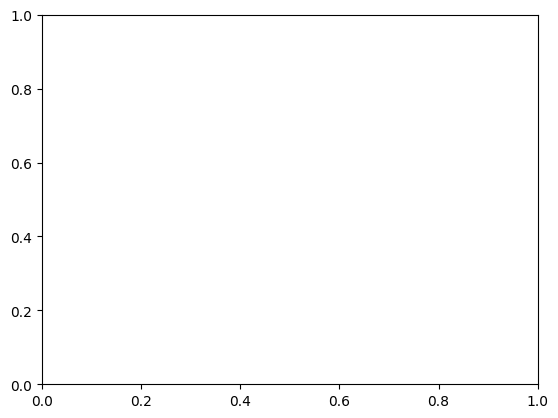

In [58]:
import matplotlib.pyplot as plt

#캔버스 생성
figure = plt.figure()
print(figure)
axes = figure.add_subplot(1, 1, 1)
print(axes)
#Axes(0.125,0.11;0.775x0.77)
#0.125 : 그래프의 왼쪽 경계 위치 0~1 상대적인 위치
#0.11 : 그래프의 아래쪽 경계 위치 0~1 상대적인 위치
#0.775 : 그래프의 가로 크기 0~1 상대적인 크기(1은 전체 가로크기)
#0.77 : 그래프의 세로 크기 0~1 상대적인 크기(1은 전체 세로크기)


plt.show()

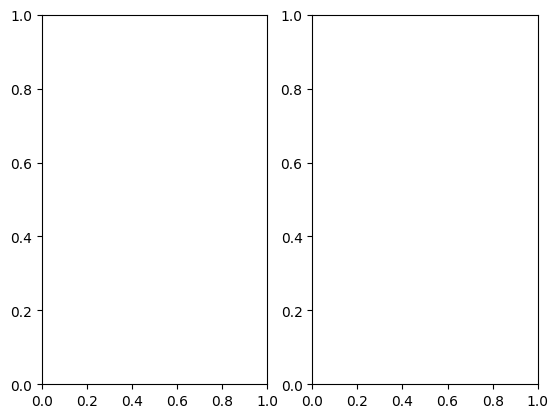

In [59]:
figure = plt.figure()
#1행 2열 1번째
axes1 = figure.add_subplot(121)
#1행 2열 2번째
axes2 = figure.add_subplot(1, 2, 2)
plt.show()

# 3. matplotlib 그래프

## 1) plot() : 꺽은선형 그래프



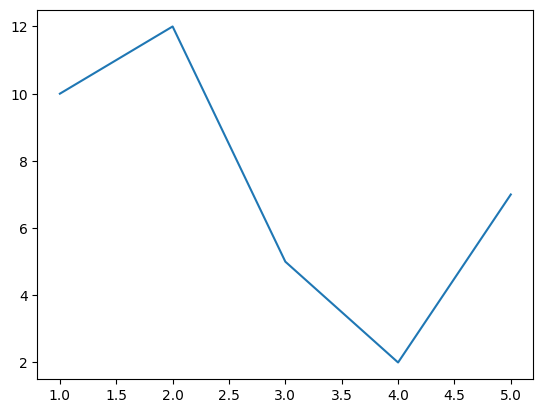

In [60]:
figure = plt.figure()
axes = figure.add_subplot(111)
x = [1,2,3,4,5]
y = [10,12,5,2,7]

#선그래프그리기
axes.plot(x, y)
#그래프 출력
plt.show()

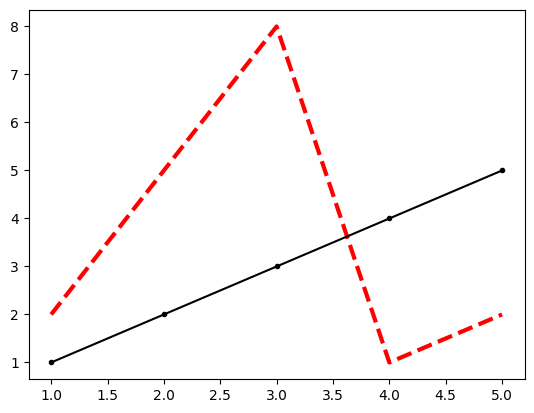

In [61]:
#그래프가 여러개일때
figure = plt.figure()
axes = figure.add_subplot(111)
x = [1, 2, 3, 4, 5]
y1 = [ 2, 5, 8, 1, 2]
y2 = [1, 2, 3, 4, 5]

axes.plot(x, y1, color = 'red', linewidth = '3.0', linestyle='dashed')
axes.plot(x, y2, color = 'black', marker = '.')
# axes.plot(x, y1, x, y2, marker = '.', linestyle='dashed')

plt.show()

## 2) bar() : 막대그래프


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum #나눔폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#설치 후 런타임->세션 다시시작 클릭
#현 코드셀 다시 실행
plt.rc('font', family = 'NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

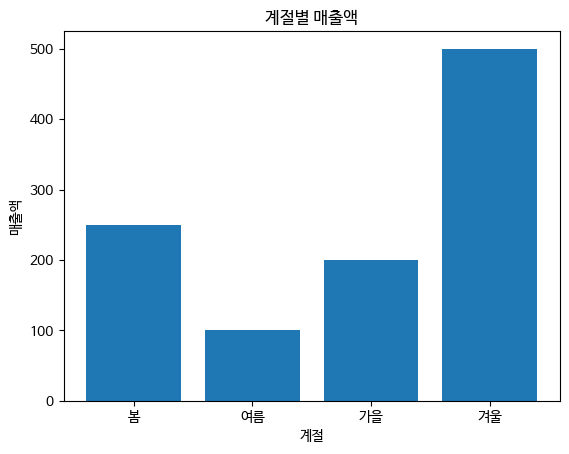

In [10]:
import numpy as np
import matplotlib.pyplot as plt

figure = plt.figure()
axes = figure.add_subplot(111)

x = ['봄', '여름', '가을', '겨울']
y = [250, 100, 200, 500]

axes.bar(x, y)
plt.xlabel("계절")
plt.ylabel("매출액")
plt.title("계절별 매출액")

plt.show()
# plt.rc('font', size = 12)

### +) 다중막대 그래프

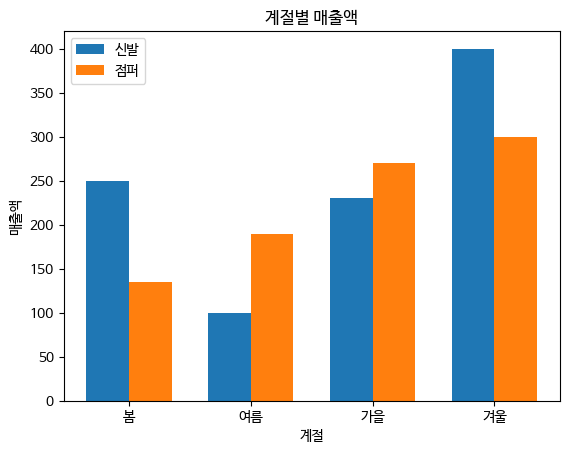

In [13]:
#여러개의 막대그래프
figure = plt.figure()
axes = figure.add_subplot(111)

category = ['봄','여름', '가을', '겨울']
y1 = [250, 100, 230, 400]
y2 = [135, 190, 270, 300]

#그래프 위치 설정
bar_width = 0.35
x = range(len(category ))

#두개의 막대그래프 그리기
axes.bar(x, y1, width = bar_width, label = "신발")
axes.bar([i + bar_width for i in x], y2, width = bar_width, label = "점퍼")

plt.xticks([i+bar_width / 2 for i in x], category) #x축 레이블 설정
plt.legend(loc='upper left')

plt.xlabel("계절")
plt.ylabel("매출액")
plt.title("계절별 매출액")

plt.show()

## 4) 산포 그래프

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


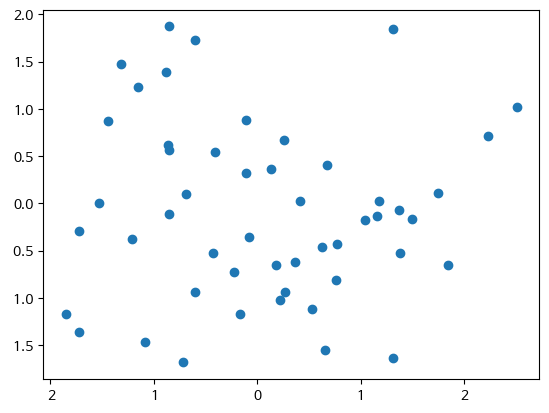

In [14]:
figure = plt.figure()
axes = figure.add_subplot(111)

x = np.random.randn(50) #50개의 랜덤한 값을 생성
y = np.random.randn(50)

#산포그래프
plt.scatter(x, y)
plt.show()

## 5) pie() : 원형그래프



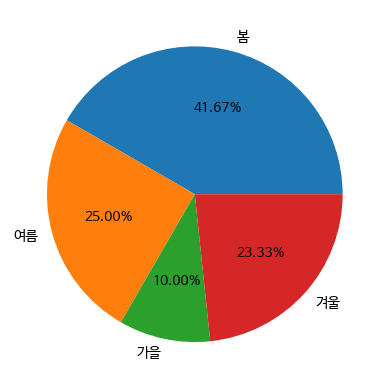

In [19]:
figure = plt.figure()
axes = figure.add_subplot(111)

labels = ['봄', '여름', '가을', '겨울']
ratio = [50, 30, 12, 28]    #100을 기준으로 각 값이 몇퍼센트를 차지하는지 알려줌

axes.pie(ratio, labels = labels, autopct="%.2f%%")
#autopct는 부채꼴 안에 표시될 숫자의 형태를 지정할 수 있는 옵션
#%.1f 소수점 한자리까지 출력
#%%는 %를 표시
plt.show()

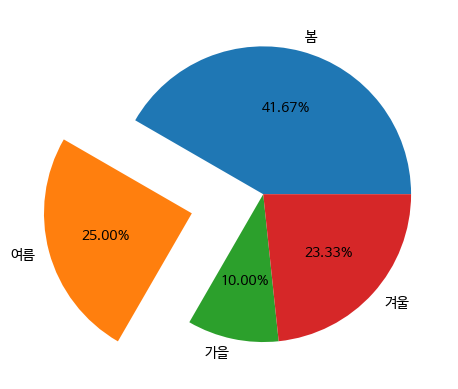

In [24]:
#여름 조각 빼내기
figure = plt.figure()
axes = figure.add_subplot(111)

labels = ['봄', '여름', '가을', '겨울']
ratio = [50, 30, 12, 28]    #100을 기준으로 각 값이 몇퍼센트를 차지하는지 알려줌

explode = [0, 0.5, 0, 0 ]

axes.pie(ratio, labels = labels, autopct="%.2f%%", explode=explode)
#explode : 파이챠트에서 각 조각이 원래 위치에서 얼마나 떨어져야 하는지를 설정하는 인수
#입력한 값은 파이챠트의 반지름에 대한 비율이다
# explode값이 클수록 해당 조각은 파이 차트의 중심에서 멀어지게 된다

plt.show()

In [ ]:
#여름조각 빼내기
figure = plt.figure()
axes = figure.add_subplot(111)

labels = ['봄', '여름', '가을', '겨울']
ratio = [50, 30, 12, 28]

explode = [0.01, 0.05, 0.01, 0.01]

axes.pie(ratio, labels = labels, autopct="%.2f%%", explode=explode,
         wedgeprops = {'linewidth': 2, 'edgecolor' :'black'})
#explode : 파이차트에서 각 조각이 원래 위치에서 얼마나 떨어져야하는지를 설정하는 매개변수
#입력한 값은 파이차트의 반지름에 대한 비율이다
#explode의 값이 클수록 해당 조각은 파이 차트의 중심에서 멀어지게 된다

#wedgeprops : 파이차트에서 각 웹지의 속성을 설정하는 데 사용하는 매개변수
#각 웨지의 스타일 및 속성을 조정할 때 사용
#edgecolor : 테두리의 색성
#linewidth : 테두리의 굵기

plt.show()

### +) 판다스를 이용한 그래프 출력


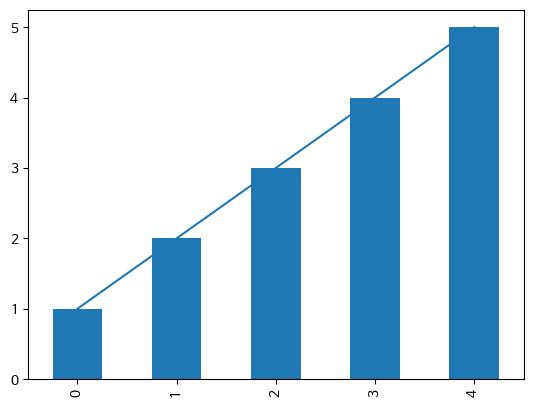

In [29]:
#데이터 생성
data = pd.Series([1, 2, 3, 4, 5])
#pd.Series() 함수를 이용하여 길이가 5인 1차원 시리즈 생성

# data

#선그래프 그리기
data.plot()
#막대그래프 그리기
data.plot(kind = "bar")

#kind 옵션으로 그래프 종류 설정
#line (default) : 선그래프
# bar : 수직막대그래프
# barh : 수평막대그래프
# hist : 히스토그램
# box : 박스플롯
# kde : 커널밀도그래프
# density : 밀도 그래프
# pie : 파이차트
# area : 면적그래프
# scatter : 산포그래프

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


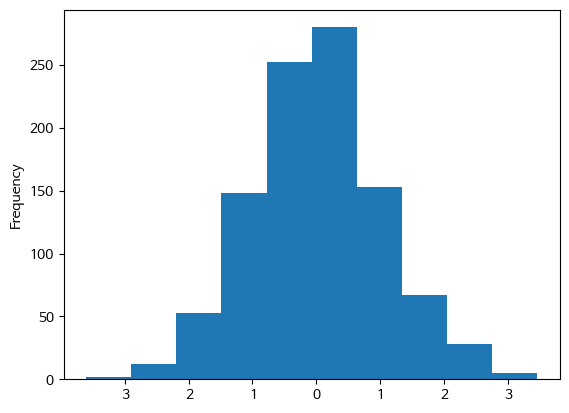

In [30]:
data = pd.Series(np.random.randn(1000))

#히스토그램
# plt.hist(data, bins = 30)
data.plot(kind ='hist')

plt.show()

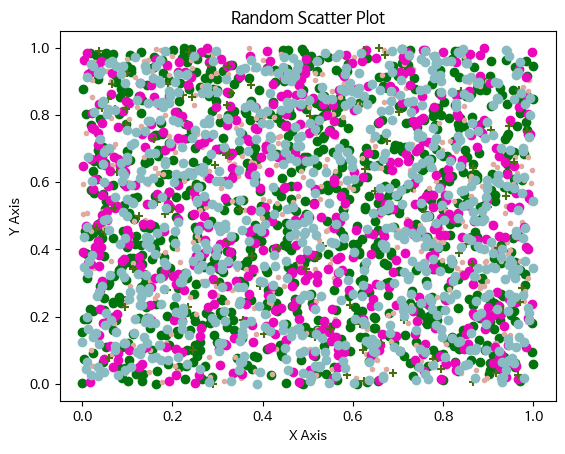

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 배열 개수
num_arrays = 5

# 산포 그래프 그리기
for i in range(num_arrays):
    # 배열 크기 랜덤하게 결정
    size = np.random.randint(100, 1000)

    # 배열 값 랜덤하게 결정
    x = np.random.rand(size)
    y = np.random.rand(size)

    # 산포 그래프 그리기
    plt.scatter(x, y, color=np.random.rand(3,), marker=np.random.choice(['o', '+', 'x', '*', 's', 'd', '.']))

# 타이틀, 축 레이블 설정
plt.title('Random Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# 그래프 출력
plt.show()

In [32]:
#iphone.csv

#.read_csv('iphone.csv', encoding = 'cp949')
#.read_csv('iphone.csv', index_col = 0)

#1. iPhone 14의 출시일, 메모리만 출력

#2. iPhone x 한 행을 출력

#3. Face ID를 지원하는 iPhone 모델의 개수

#4. iOS 14 이상 버전을 지원하는 iPhone 모델

#5.iphone 11 pro 까지의(포함) 출시일, 디스플레이 출력(새로운 데이터 프레임이용)